# Image Segmentation Dataset Analysis

This notebook loads and analyzes image and mask data for segmentation tasks.

## Import Required Libraries

In [1]:
import numpy as np
import joblib as jlb
import os
import matplotlib.pyplot as plt
import seaborn as sns
import random

## Load Dataset

Loading image and mask arrays from disk.

In [2]:
# Loading image and mask arrays
ims = jlb.load(r'/home/hardik/Desktop/python_intern/archive (1)/ims.np')
mas = jlb.load(r'/home/hardik/Desktop/python_intern/archive (1)/mas.np')

print("Dataset loaded successfully")
print(f"Total images: {ims.shape[0]}")
print(f"Image dimensions: {ims.shape[1:]}")   # (H, W, Channels)
print(f"Mask dimensions: {mas.shape[1:]}")   # (H, W)
print(f"Image dtype: {ims.dtype}")
print(f"Mask dtype: {mas.dtype}")

Dataset loaded successfully
Total images: 1260
Image dimensions: (1024, 1024, 4)
Mask dimensions: (1024, 1024)
Image dtype: uint8
Mask dtype: uint8


## Load Processed Batches

In [3]:
# Path where your processed batches are saved
save_path = r'/home/hardik/Desktop/python_intern/processed_batches'

batch_files = [os.path.join(save_path, f) for f in os.listdir(save_path) if f.endswith('.pkl')]
print(batch_files)

[]


## Calculate Dataset Statistics

Computing mean, standard deviation, min, and max pixel values across all batches.

In [4]:
# Initialize accumulators
sum_pixels = 0.0
sum_squared_pixels = 0.0
pixel_count = 1
min_pixel = float('inf')
max_pixel = float('-inf')

for file in batch_files:
    ims_batch, _ = jlb.load(file)
    ims_batch = ims_batch.astype(np.float32)
    
    sum_pixels += ims_batch.sum()
    sum_squared_pixels += np.square(ims_batch).sum()
    pixel_count += ims_batch.size
    min_pixel = min(min_pixel, ims_batch.min())
    max_pixel = max(max_pixel, ims_batch.max())

# Compute global statistics
mean_pixel = sum_pixels / pixel_count
std_pixel = np.sqrt((sum_squared_pixels / pixel_count) - (mean_pixel ** 2))

print("Dataset Statistics:")
print(f"Mean Pixel Value: {mean_pixel:.4f}")
print(f"Std Dev Pixel Value: {std_pixel:.4f}")
print(f"Min Pixel Value: {min_pixel:.4f}")
print(f"Max Pixel Value: {max_pixel:.4f}")

Dataset Statistics:
Mean Pixel Value: 0.0000
Std Dev Pixel Value: 0.0000
Min Pixel Value: inf
Max Pixel Value: -inf


## Image Resolution and Shape Analysis

In [5]:
# For image resolution, compute height and width
height, width, channels = ims.shape[1:]
print(f"Image height: {height}px")
print(f"Image width: {width}px")
print(f"Number of channels: {channels}")

# Verify consistency across all images
unique_shapes = {img.shape for img in ims}
print(f"Unique image shapes in dataset: {unique_shapes}")

Image height: 1024px
Image width: 1024px
Number of channels: 4
Unique image shapes in dataset: {(1024, 1024, 4)}


## Mask Statistics

In [6]:
# Check unique values (should be 0 and 1)
unique_mask_vals = np.unique(mas)
print("Unique mask values:", unique_mask_vals)

# Calculate percentage of foreground pixels (buildings, roads, etc.)
mask_mean = mas.mean() * 100
print(f"Average foreground pixel percentage: {mask_mean:.2f}%")

Unique mask values: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 24

## Pixel Intensity Distribution

Visualizing the distribution of pixel values across channels.

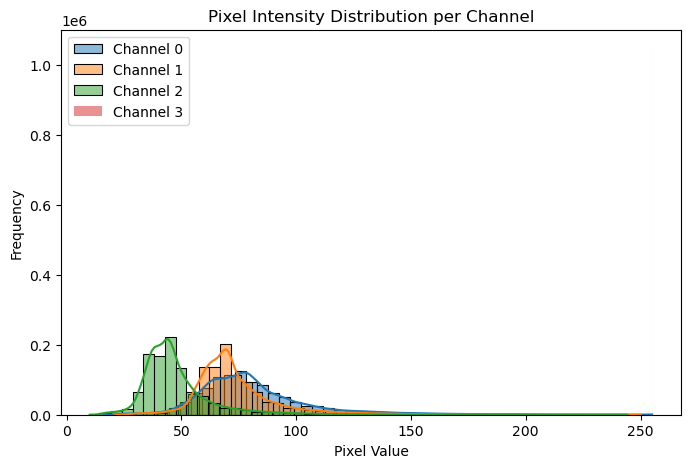

In [7]:
# Flatten a sample image for pixel histogram
sample_img = ims[0].reshape(-1, ims.shape[-1])
plt.figure(figsize=(8, 5))
for c in range(sample_img.shape[1]):
    sns.histplot(sample_img[:, c], bins=50, kde=True, label=f'Channel {c}')
plt.legend()
plt.title("Pixel Intensity Distribution per Channel")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

## Visualize Random Samples

Display random images with their corresponding masks overlaid.

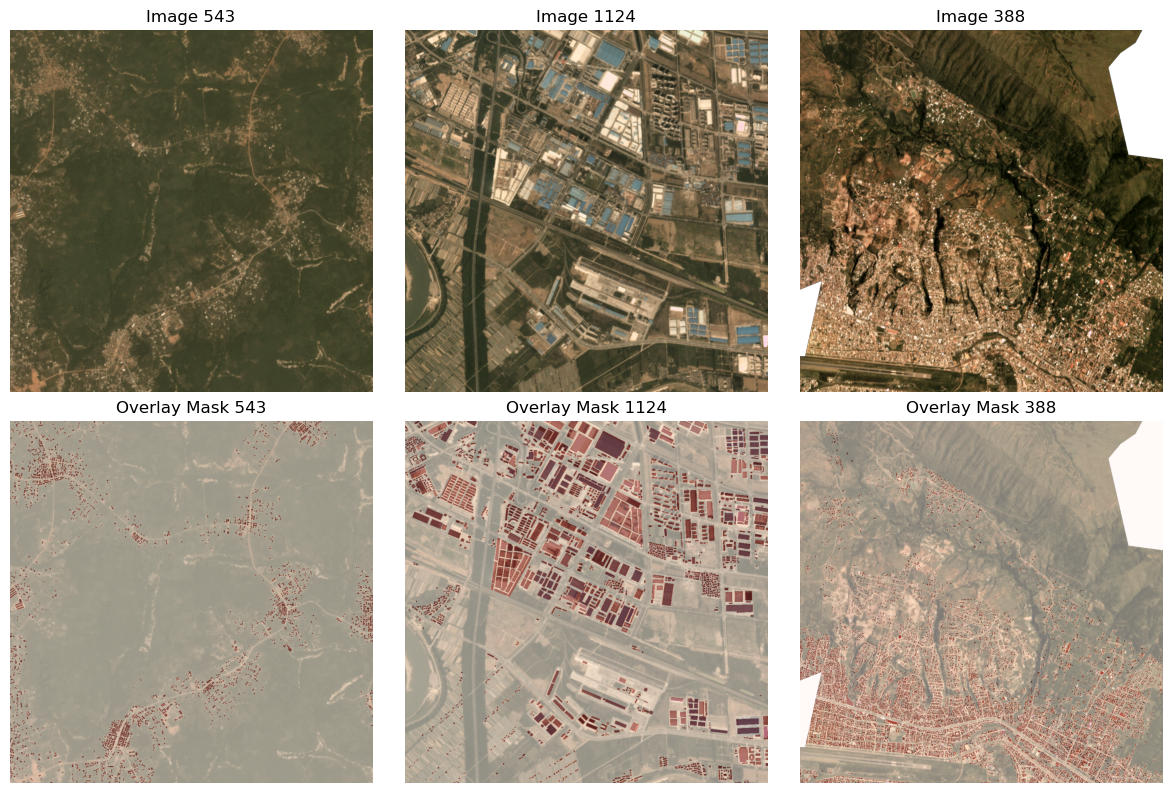

In [8]:
# Pick random indices
indices = random.sample(range(ims.shape[0]), 3)

plt.figure(figsize=(12, 8))
for i, idx in enumerate(indices):
    img = ims[idx]
    mask = mas[idx]

    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.title(f"Image {idx}")
    plt.axis('off')

    plt.subplot(2, 3, i + 4)
    plt.imshow(img)
    plt.imshow(mask.squeeze(), cmap='Reds', alpha=0.5)
    plt.title(f"Overlay Mask {idx}")
    plt.axis('off')

plt.tight_layout()
plt.show()